# Exploring NYC Public School Test Result Scores

In [34]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

schools = pd.read_csv('/content/schools.csv')
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [35]:
schools.describe()

,average_math,average_reading,average_writing,percent_tested
count,375.000000,375.000000,375.000000,355.000000
mean,432.944000,424.504000,418.458667,64.976338
std,71.952373,61.881069,64.548599,18.747634
min,317.000000,302.000000,284.000000,18.500000
25%,386.000000,386.000000,382.000000,50.950000
50%,415.000000,413.000000,403.000000,64.800000
75%,458.500000,445.000000,437.500000,79.600000
max,754.000000,697.000000,693.000000,100.000000


In [36]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


In [37]:
# replace missing values in percent_tested cols with median values

schools['percent_tested'] = schools['percent_tested'].fillna(schools['percent_tested'].median())

schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   375 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


In [38]:
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,64.8
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [39]:
schools['average_math'].max()

754

### Ques1 : NYC schools that have the best Math results

In [40]:
# see NYC schools that have the best Math results

best_math_schools = schools[schools['average_math'] >= 640][['school_name', 'average_math']].sort_values('average_math', ascending=False)
best_math_schools.head()


,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683


In [41]:
schools.columns

Index(['school_name', 'borough', 'building_code', 'average_math',
       'average_reading', 'average_writing', 'percent_tested'],
      dtype='object')

### Top-10 performing schools by total SAT scores

In [42]:
# adding a new columns ['total_SAT'] intto the existing dataset

schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']

# subset the data
top_10_schools = schools[['school_name', 'total_SAT']]

# sort top 10 schools by  ['total_SAT'] in ascending order
top_10_schools = top_10_schools.sort_values(by='total_SAT', ascending=False).head(10)
top_10_schools.head()

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981


### Borough that has the largest standard deviation in the combined SAT score

In [43]:
# group schools by borough and calculate 'count', 'mean', and 'std' values on total_SAT scores
borough = schools.groupby('borough')['total_SAT'].agg(['count', 'mean', 'std']).round(2)

#show the maximun std value
value = borough['std'].max()
largest_std_dev = borough[borough['std'] == value]

# rename the column names
largest_std_dev = largest_std_dev.rename(columns={"count":"num_schools", "mean":"average_SAT", "std":"std_SAT"})
largest_std_dev.reset_index(inplace=True)

# print the result
largest_std_dev


,borough,num_schools,average_SAT,std_SAT
0,Manhattan,89,1340.13,230.29


### Borough that has the highest average SAT scores in each subject area

In [44]:
# adding a new column 'avg_score' into the existing dataset
schools['avg_score'] = schools['total_SAT'] / 3


# group schools by borough and calculate 'mean' values in each subject area including average score
schools_borough_avg = schools.groupby('borough')[['average_math', 'average_reading', 'average_writing', 'avg_score']].mean().sort_values(by = 'avg_score', ascending = False)

# round off two decimal values
schools_borough_avg = schools_borough_avg.round(2)
schools_borough_avg.head()

,average_math,average_reading,average_writing,avg_score
borough,,,,
Staten Island,486.20,478.50,474.30,479.67
Queens,462.36,443.26,439.86,448.49
Manhattan,455.89,444.93,439.31,446.71
Brooklyn,416.40,410.76,403.09,410.09
Bronx,404.36,402.52,395.85,400.91


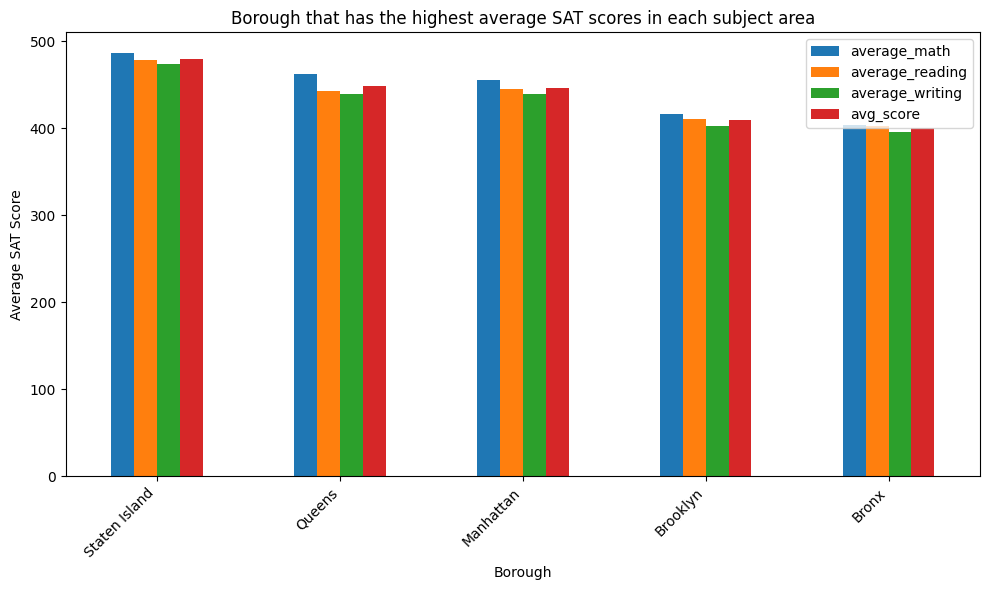

In [45]:
schools_borough_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Borough that has the highest average SAT scores in each subject area')
plt.xlabel('Borough')
plt.ylabel('Average SAT Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### top-performing and lowest-performing schools in each borough based on SAT *scores*

In [46]:
# add a new column ['high_performance'] into the existing dataset

schools['high_performance'] = schools['avg_score'] > 640

In [47]:
# subset the high-performance schools, then groupby borough, school name, average score

top_perform_schools_borough = schools[schools['high_performance'] == True].groupby('borough')[['school_name', 'avg_score']].apply(lambda x: x.sort_values(by = 'avg_score', ascending = False))
top_perform_schools_borough

school_name  \
borough                                                                
Bronx         170                       Bronx High School of Science   
              174  High School of American Studies at Lehman College   
Manhattan     88                              Stuyvesant High School   
Queens        333                        Townsend Harris High School   
              365  Queens High School for the Sciences at York Co...   
Staten Island 93                 Staten Island Technical High School   

                    avg_score  
borough                        
Bronx         170  680.333333  
              174  671.000000  
Manhattan     88   714.666667  
Queens        333  660.333333  
              365  649.000000  
Staten Island 93   680.333333

In [48]:
# subset the low-performance schools, then groupby borough, school name, and average score
low_perform_schools_borough = schools[schools['high_performance'] == False].groupby('borough')[['school_name', 'avg_score']].apply(lambda x: x.sort_values(by = 'avg_score', ascending = False))
low_perform_schools_borough.head()


school_name   avg_score
borough                                                           
Bronx   116   Bronx Center for Science and Mathematics  488.666667
        159              Riverdale/Kingsbridge Academy  485.666667
        180  Collegiate Institute for Math and Science  469.000000
        110          Hostos-Lincoln Academy of Science  449.666667
        183                              Cinema School  442.333333

### variability of SAT scores (standard deviation) differ across boroughs for each subject area

In [49]:
# group schools by borough and calculate 'std' values in each subject area
schools_borough_std = schools.groupby('borough')[['average_math', 'average_reading', 'average_writing', 'avg_score']].std().sort_values(by = 'avg_score', ascending = False)

# round off two-decimal values
schools_borough_std.round(2).head()

,average_math,average_reading,average_writing,avg_score
borough,,,,
Manhattan,83.82,73.93,76.39,76.76
Staten Island,83.13,66.85,72.67,74.10
Queens,71.89,61.71,66.23,65.08
Brooklyn,60.48,48.91,49.66,51.62
Bronx,52.22,49.22,51.30,50.13


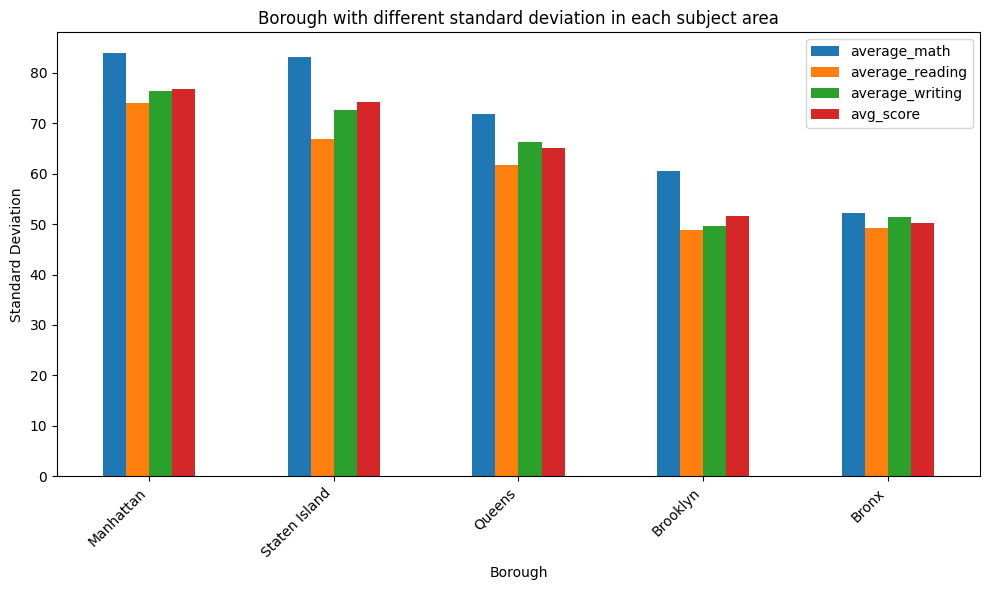

In [50]:
schools_borough_std.plot(kind='bar', figsize=(10, 6))
plt.title('Borough with different standard deviation in each subject area')
plt.xlabel('Borough')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### correlation between the percent tested and average SAT scores at the borough level

In [51]:
# see the unique borough names in ['borough'] colummn
boroughs = schools['borough'].unique()
boroughs

array(['Manhattan', 'Staten Island', 'Bronx', 'Queens', 'Brooklyn'],
      dtype=object)

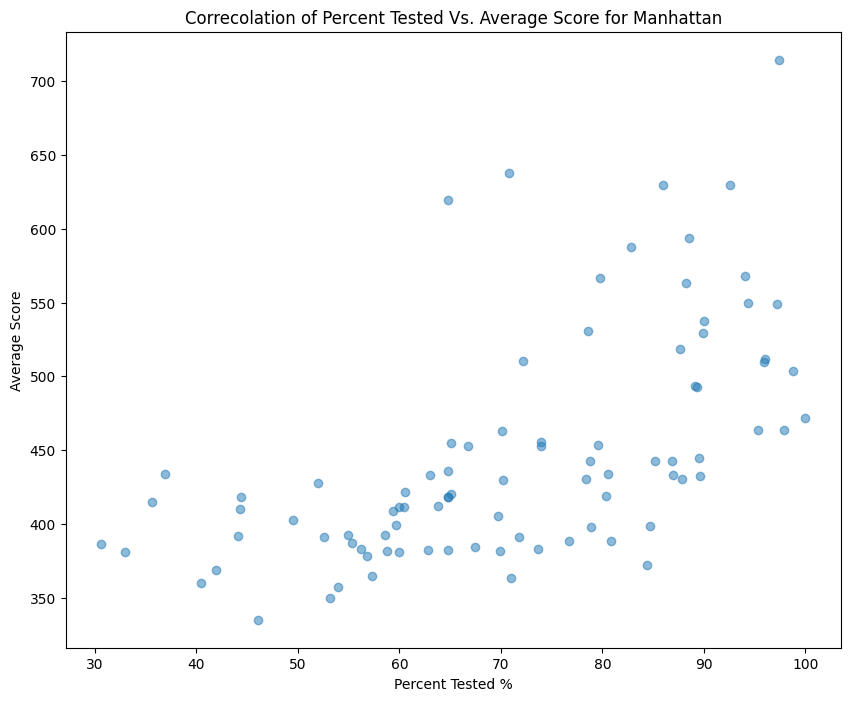

In [52]:
# subset the data only for Manhattan
borough_Manhattan_corr = schools[schools['borough'] == "Manhattan"]

# subset the dataset with specific columns
borough_Manhattan_corr = borough_Manhattan_corr[['borough', 'percent_tested', 'avg_score']]
borough_Manhattan_corr.head()

# scatter plot visualization
plt.figure(figsize=(10, 8))
plt.plot(borough_Manhattan_corr['percent_tested'], borough_Manhattan_corr['avg_score'], 'o', alpha = 0.5)
plt.xlabel('Percent Tested %')
plt.ylabel('Average Score')
plt.title('Correcolation of Percent Tested Vs. Average Score for Manhattan')
plt.show()

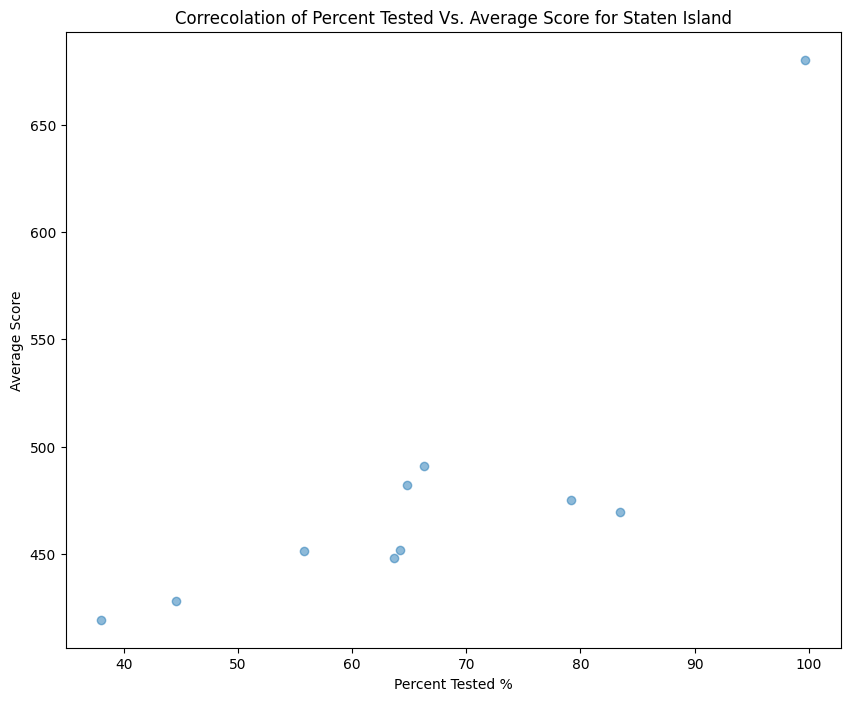

In [53]:
# subset data only for Staten_Island
borough_Staten_corr = schools[schools['borough'] == "Staten Island"]

borough_Staten_corr = borough_Staten_corr[['borough', 'percent_tested', 'avg_score']]
borough_Staten_corr.shape

# scatter plot visualization
plt.figure(figsize=(10, 8))
plt.plot(borough_Staten_corr['percent_tested'], borough_Staten_corr['avg_score'], 'o', alpha = 0.5)
plt.xlabel('Percent Tested %')
plt.ylabel('Average Score')
plt.title('Correcolation of Percent Tested Vs. Average Score for Staten Island')
plt.show()

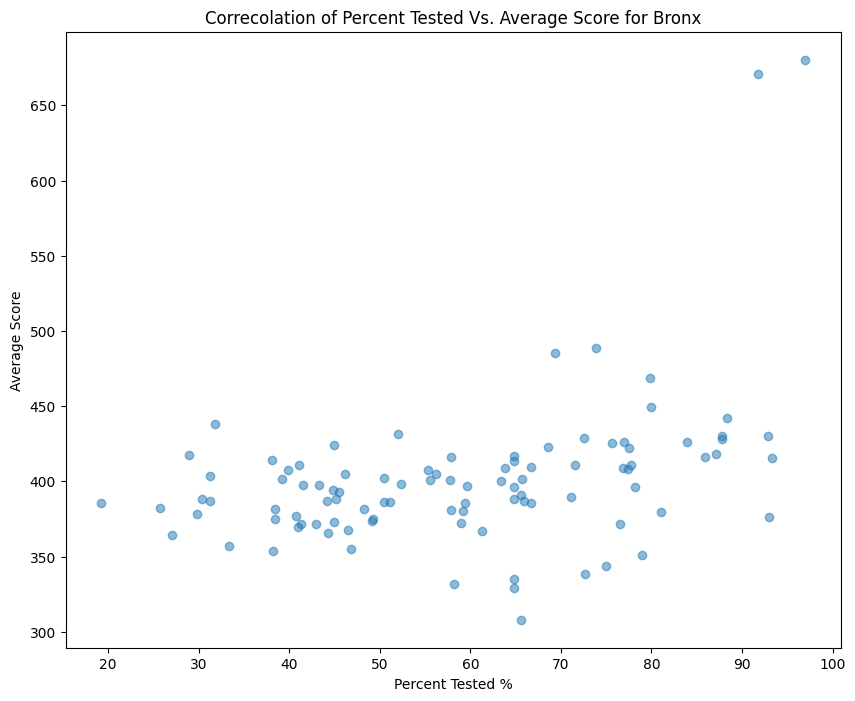

In [54]:
# subset the data for Bronx
borough_Bronx_corr = schools[schools['borough'] == "Bronx"]

borough_Bronx_corr = borough_Bronx_corr[['borough', 'percent_tested', 'avg_score']]
borough_Bronx_corr.shape


# scatter plt visualization
plt.figure(figsize=(10, 8))
plt.plot(borough_Bronx_corr['percent_tested'], borough_Bronx_corr['avg_score'], 'o', alpha = 0.5)
plt.xlabel('Percent Tested %')
plt.ylabel('Average Score')
plt.title('Correcolation of Percent Tested Vs. Average Score for Bronx')
plt.show()


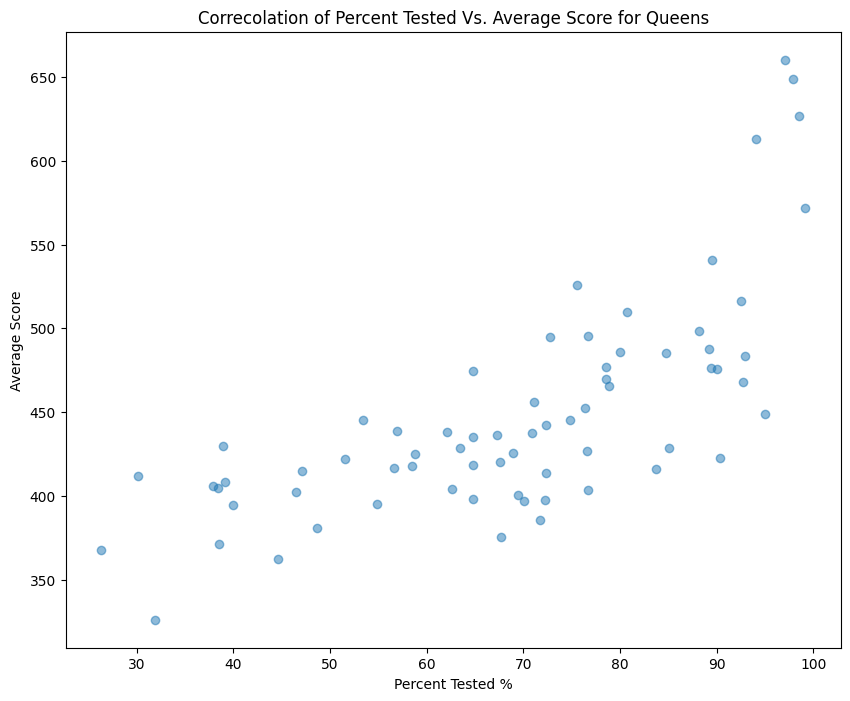

In [55]:
# subset the data for Queens
borough_Queens_corr = schools[schools['borough'] == "Queens"]

borough_Queens_corr = borough_Queens_corr[['borough', 'percent_tested', 'avg_score']]
borough_Queens_corr.shape
borough_Queens_corr.head()

# scatter plot visualization
plt.figure(figsize=(10, 8))
plt.plot(borough_Queens_corr['percent_tested'], borough_Queens_corr['avg_score'], 'o', alpha = 0.5)
plt.xlabel('Percent Tested %')
plt.ylabel('Average Score')
plt.title('Correcolation of Percent Tested Vs. Average Score for Queens')
plt.show()

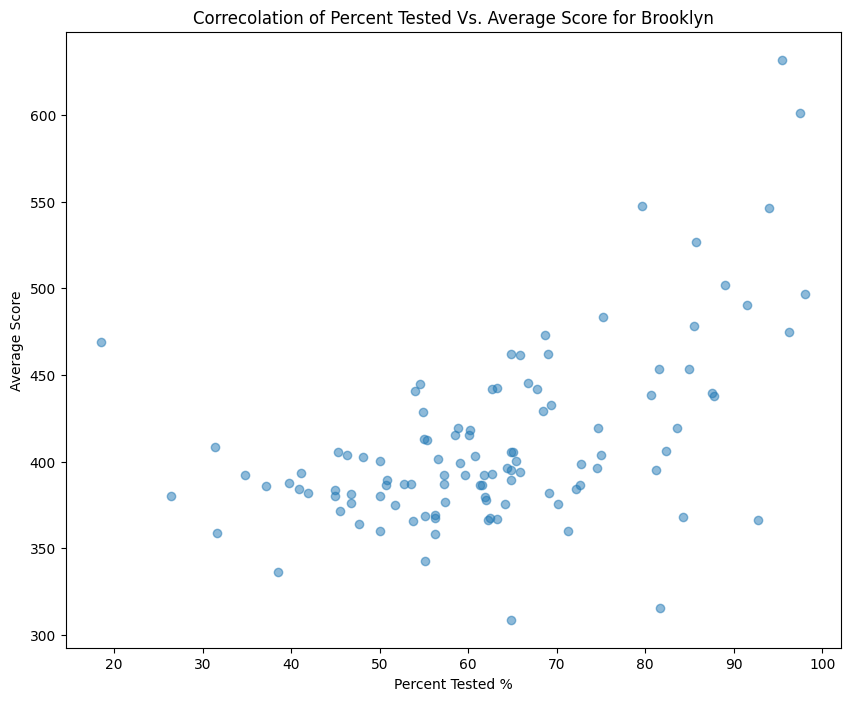

In [56]:
# subset the data for Brooklyn

borough_Brooklyn_corr = schools[schools['borough'] == "Brooklyn"]

borough_Brooklyn_corr = borough_Brooklyn_corr[['borough', 'percent_tested', 'avg_score']]
borough_Brooklyn_corr.shape
borough_Brooklyn_corr.head()

# scatter plot visualization
plt.figure(figsize=(10, 8))
plt.plot(borough_Brooklyn_corr['percent_tested'], borough_Brooklyn_corr['avg_score'], 'o', alpha = 0.5)
plt.xlabel('Percent Tested %')
plt.ylabel('Average Score')
plt.title('Correcolation of Percent Tested Vs. Average Score for Brooklyn')
plt.show()

### categorized schools as high-performing compare to those categorized as low-performing in terms of the average percent tested in each borough

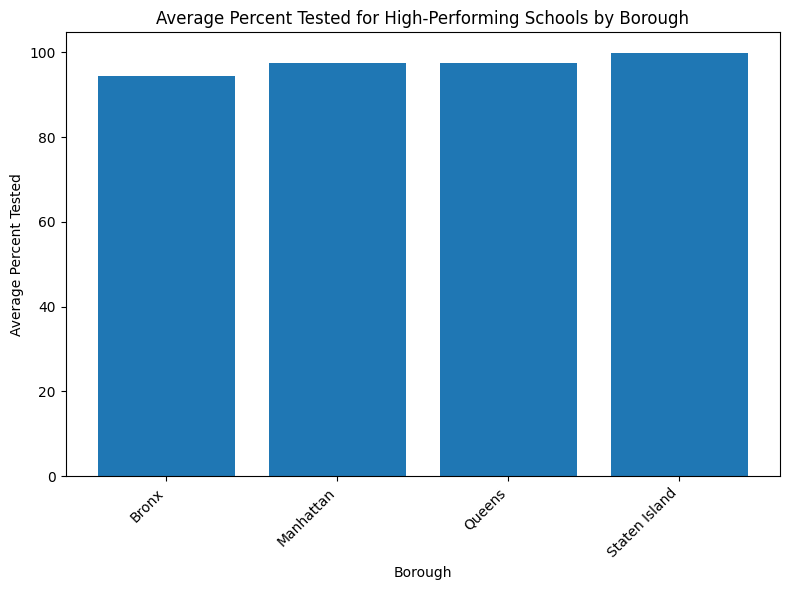

In [57]:

# first, calculate average percent-tested per borough for high-performing schools

high_performing = schools[schools['high_performance'] == True]
high_avg_percent_tested = high_performing.groupby('borough')['percent_tested'].mean().reset_index()
high_avg_percent_tested.shape

# visualization

plt.figure(figsize=(8, 6))
plt.bar(high_avg_percent_tested['borough'], high_avg_percent_tested['percent_tested'])
plt.xlabel('Borough')
plt.ylabel('Average Percent Tested')
plt.title('Average Percent Tested for High-Performing Schools by Borough')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Calculate average percent tested per borough for low-performing schools

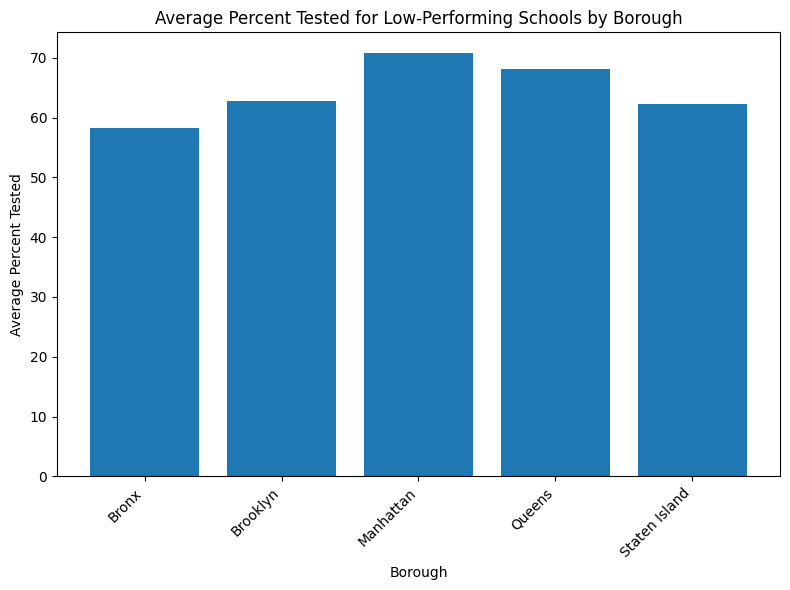

In [58]:
low_performing = schools[schools['high_performance'] == False]
low_avg_percent_tested = low_performing.groupby('borough')['percent_tested'].mean().reset_index()

low_avg_percent_tested.shape

# visualization

plt.figure(figsize=(8, 6))
plt.bar(low_avg_percent_tested['borough'], low_avg_percent_tested['percent_tested'])
plt.xlabel('Borough')
plt.ylabel('Average Percent Tested')
plt.title('Average Percent Tested for Low-Performing Schools by Borough')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()